In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from tensorflow.keras import layers, models
%reload_ext autoreload
%autoreload 1
%aimport gen_funcs
%aimport mod_fun
from gen_funcs import*
from mod_fun import*

In this section I am going to find very simple model that could find the difference between randomly generated image of line and circle of size 100x100 

In [2]:
n = 100
mod_1 = models.Sequential()
#there will be only 2 categories so I want to try if 2 filters will be enough
mod_1.add(layers.Conv2D(2, (5,5), activation = "sigmoid" ,input_shape = (n, n, 1))) 
mod_1.add(layers.Flatten())
mod_1.add(layers.Dense(2, activation = "softmax")) #we have 2 categories so output must be vector of length 2
mod_1.compile(optimizer = "sgd", loss = "mse")
mod_1.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 2)         52        
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 2)                 36866     
                                                                 
Total params: 36918 (144.21 KB)
Trainable params: 36918 (144.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now I will generate num_data_1 images of line and circle and shuffle it, then I will train model on this data

already trained

7/7 [==============================] - 1s 7ms/step - loss: 0.2916
Accuracy of model: 0.2915704846382141
1/1 [==============================] - 0s 180ms/step


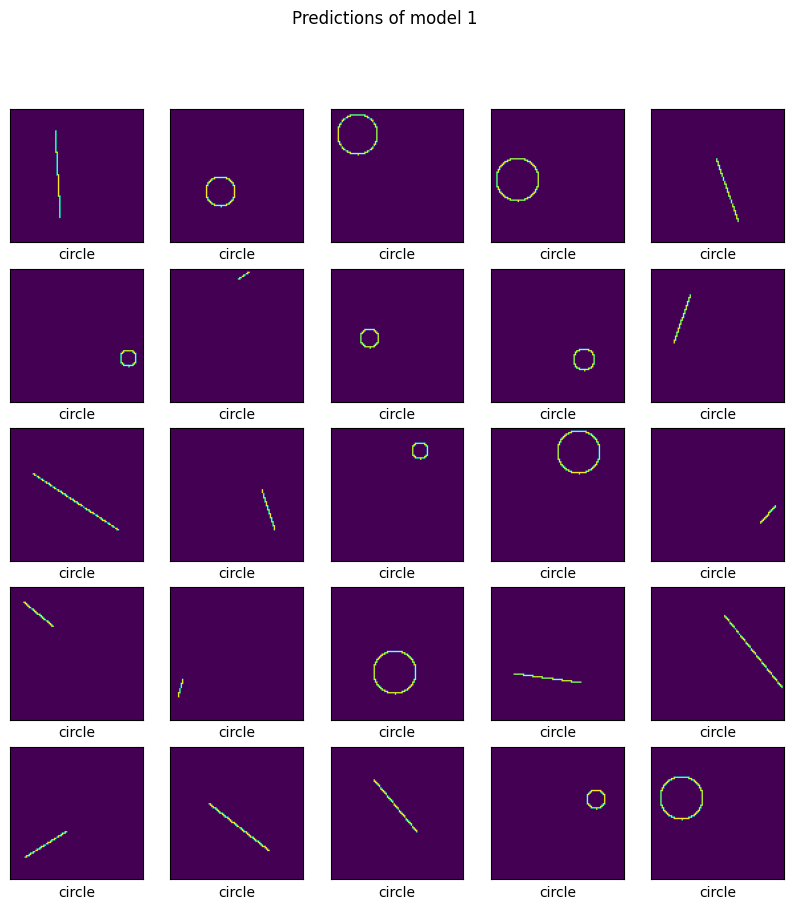

In [3]:
show_model(mod_1, n, 500, ["line", "circle"], "save_1")

already trained
63/63 [==============================] - 0s 4ms/step - loss: 0.2521
Accuracy of model: 0.25214388966560364
1/1 [==============================] - 0s 32ms/step


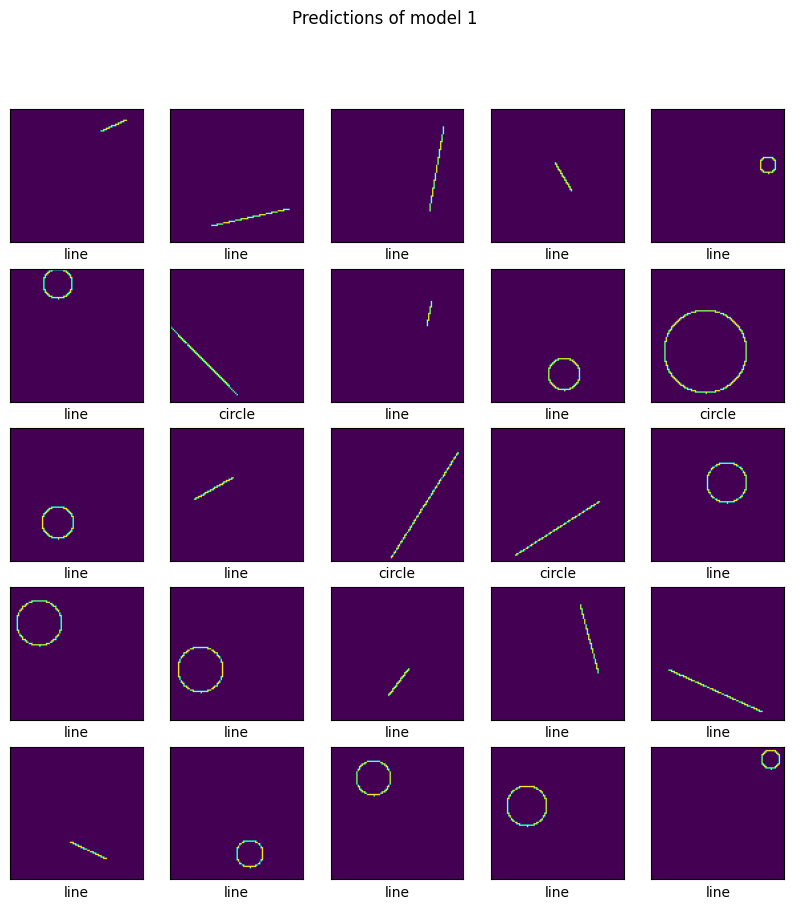

In [4]:
show_model(mod_1, n, 5000, ["line", "circle"], "save_2")

We can see that mod_1 is probably too simple. I will create more complicated model

In [5]:
n = 100
mod_2 = models.Sequential()
#there will be only 2 categories so I want to try if 2 filters will be enough
mod_2.add(layers.Conv2D(10, (5,5), activation = "sigmoid" ,input_shape = (n, n, 1))) 
mod_2.add(layers.MaxPooling2D((2, 2)))
mod_2.add(layers.Conv2D(10, (5,5), activation = "sigmoid")) 
mod_2.add(layers.Flatten())
mod_2.add(layers.Dense(2, activation = "softmax")) #we have 2 categories so output must be vector of length 2
mod_2.compile(optimizer = "sgd", loss = "mse")
mod_2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 96, 96, 10)        260       
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 10)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 10)        2510      
                                                                 
 flatten_1 (Flatten)         (None, 19360)             0         
                                                                 
 dense_1 (Dense)             (None, 2)                 38722     
                                                                 
Total params: 41492 (162.08 KB)
Trainable params: 41492 (162.08 KB)
Non-trainable params: 0 (0.00 Byte)
_______________

already trained
63/63 [==============================] - 1s 8ms/step - loss: 0.2501
Accuracy of model: 0.250068336725235
1/1 [==============================] - 0s 100ms/step


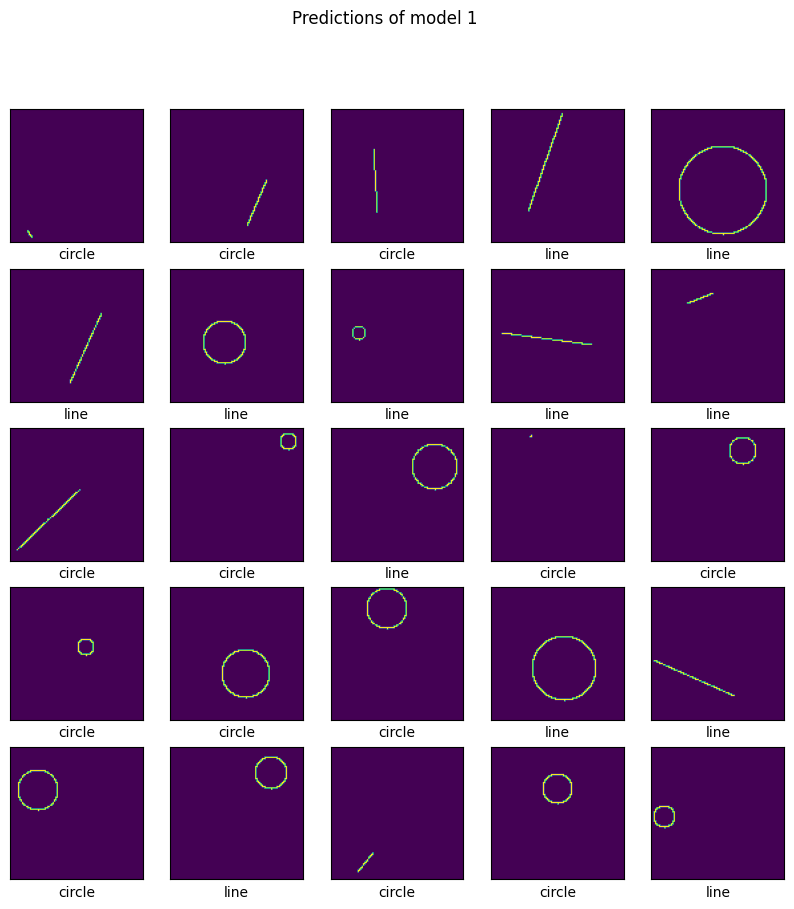

In [6]:
show_model(mod_2, n, 5000, ["line", "circle"], "save_3")

In [7]:
n = 100
mod_3 = models.Sequential()
#there will be only 2 categories so I want to try if 2 filters will be enough
mod_3.add(layers.Conv2D(10, (5,5), activation = "relu" ,input_shape = (n, n, 1))) 
mod_3.add(layers.MaxPooling2D((2, 2)))
mod_3.add(layers.Conv2D(10, (5,5), activation = "relu")) 
mod_3.add(layers.MaxPooling2D((2, 2)))
mod_3.add(layers.Flatten())
mod_3.add(layers.Dense(64, activation = "relu")) 
mod_3.add(layers.Dense(64, activation = "relu")) 
mod_3.add(layers.Dense(2, activation = "softmax")) #we have 2 categories so output must be vector of length 2
mod_3.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy")
mod_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 96, 96, 10)        260       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 44, 44, 10)        2510      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 22, 22, 10)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4840)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

already trained
2/2 [==============================] - 0s 8ms/step - loss: 2.3623
Accuracy of model: 2.3622794151306152
1/1 [==============================] - 0s 128ms/step


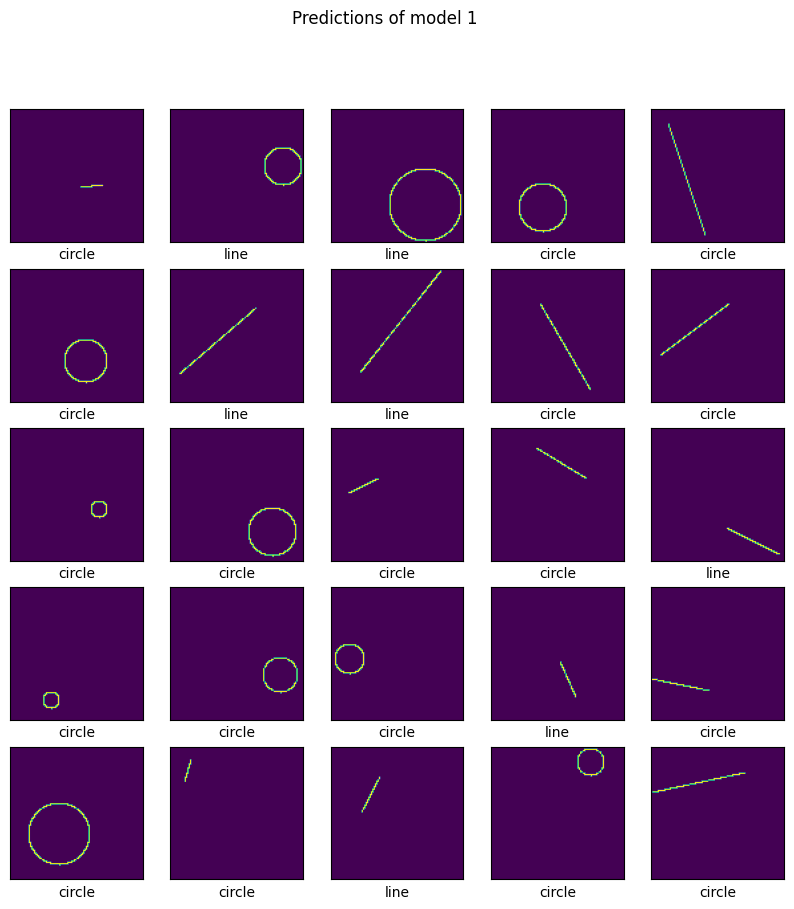

In [8]:
show_model(mod_3, n, 100, ["line", "circle"], "save_4",override=False, num_epochs=100)

In [9]:
n = 100
mod_4 = models.Sequential()
mod_4.add(layers.Conv2D(5, (11,11), activation = "sigmoid" ,input_shape = (n, n, 1))) 
mod_4.add(layers.Conv2D(10, (5,5), activation = "relu")) 
mod_4.add(layers.Conv2D(15, (3,3), activation = "relu")) 
mod_4.add(layers.Flatten())
mod_4.add(layers.Dense(2, activation = "softmax")) #we have 2 categories so output must be vector of length 2
mod_4.compile(optimizer = "sgd", loss = "mse")
mod_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 90, 90, 5)         610       
                                                                 
 conv2d_6 (Conv2D)           (None, 86, 86, 10)        1260      
                                                                 
 conv2d_7 (Conv2D)           (None, 84, 84, 15)        1365      
                                                                 
 flatten_3 (Flatten)         (None, 105840)            0         
                                                                 
 dense_5 (Dense)             (None, 2)                 211682    
                                                                 
Total params: 214917 (839.52 KB)
Trainable params: 214917 (839.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


already trained
4/4 [==============================] - 0s 17ms/step - loss: 4.2509
Accuracy of model: 4.25092077255249
1/1 [==============================] - 0s 116ms/step


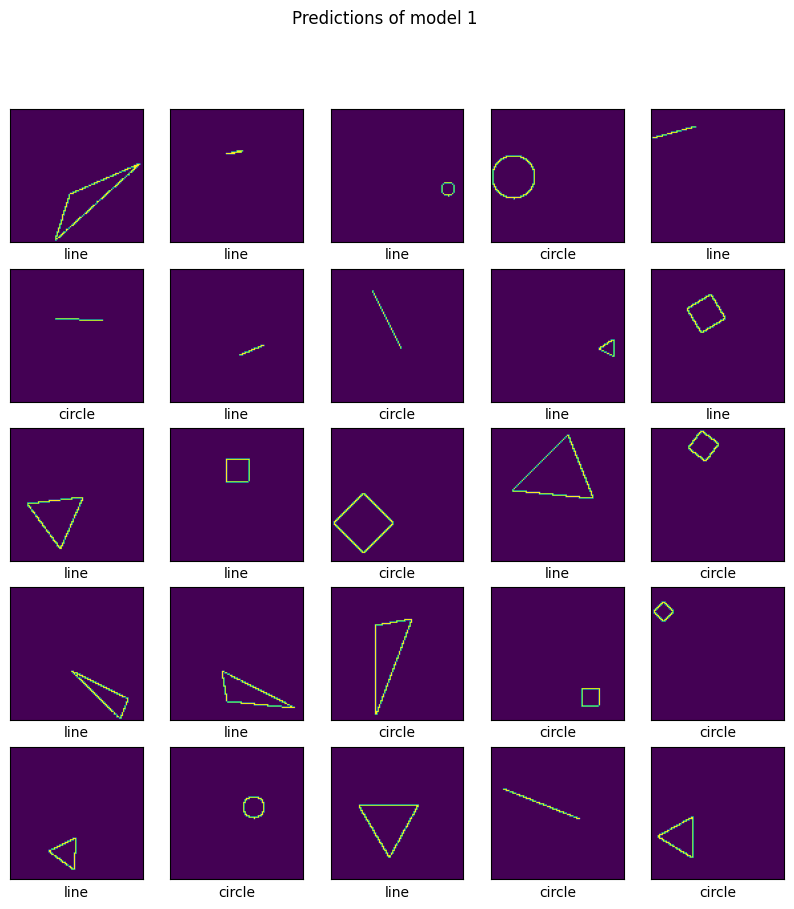

In [10]:
show_model(mod_4, n, 100, ["line", "circle", "square", "eq_tri", "tri"], "save_5",override=False, num_epochs=100)